In [126]:
#importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
#Loading the dataset
train=pd.read_csv("train_ctrUa4K.csv")
test=pd.read_csv("test_lAUu6dG.csv")
traget=train.pop("Loan_Status")

In [128]:
data=pd.concat([train,test],ignore_index=True)

In [129]:
data.isnull().sum() , data.shape

(Loan_ID               0
 Gender               24
 Married               3
 Dependents           25
 Education             0
 Self_Employed        55
 ApplicantIncome       0
 CoapplicantIncome     0
 LoanAmount           27
 Loan_Amount_Term     20
 Credit_History       79
 Property_Area         0
 dtype: int64,
 (981, 12))

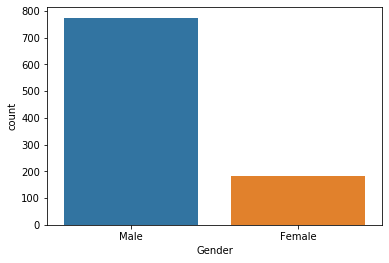

In [130]:
sns.countplot(data.Gender)

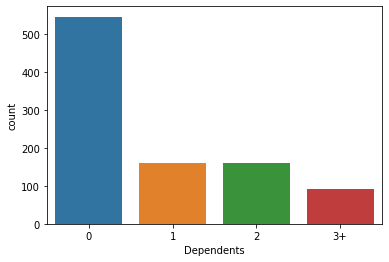

In [131]:
sns.countplot(data.Dependents)

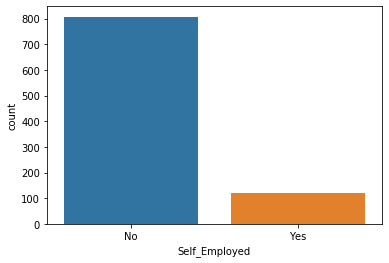

In [132]:
sns.countplot(data.Self_Employed)

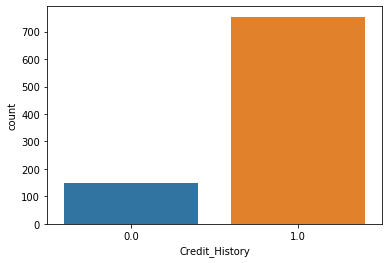

In [133]:
sns.countplot(data.Credit_History)

In [134]:
#Filling missing data for categorical variables
data["Gender"]=data["Gender"].fillna(data["Gender"].mode()[0])
data["Married"]=data["Married"].fillna(data["Married"].mode()[0])
data["Dependents"]=data["Dependents"].fillna(data["Dependents"].mode()[0])
data["Self_Employed"]=data["Self_Employed"].fillna(data["Self_Employed"].mode()[0])
data["Credit_History"]=data["Credit_History"].fillna(data["Credit_History"].mode()[0])

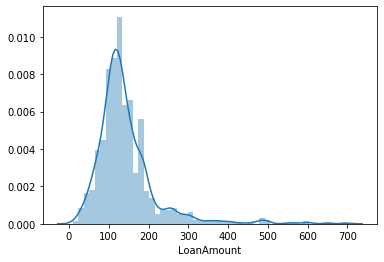

In [135]:
sns.distplot(data.LoanAmount)

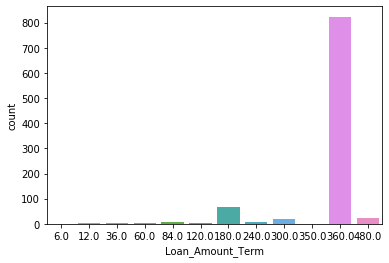

In [136]:
sns.countplot(data.Loan_Amount_Term)

In [137]:
#Filling missing data for numerical variables
data["LoanAmount"]=data["LoanAmount"].fillna(data["LoanAmount"].mean())
data["Loan_Amount_Term"]=data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mode()[0])


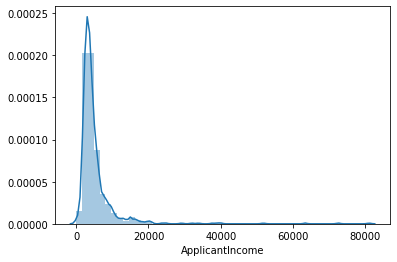

In [138]:
sns.distplot(data.ApplicantIncome)

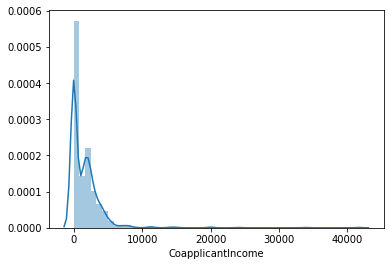

In [139]:
sns.distplot(data.CoapplicantIncome)

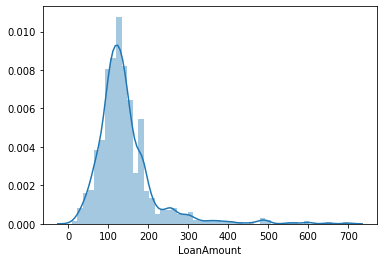

In [140]:
sns.distplot(data.LoanAmount)

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

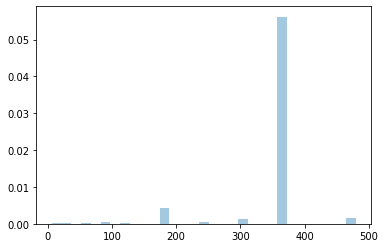

In [141]:
sns.distplot(data.Loan_Amount_Term)

In [142]:
#Feature Engineering
data["total_income"]=data["ApplicantIncome"]+data["CoapplicantIncome"]
data["EMI"]=data["LoanAmount"]*1000/data["Loan_Amount_Term"]


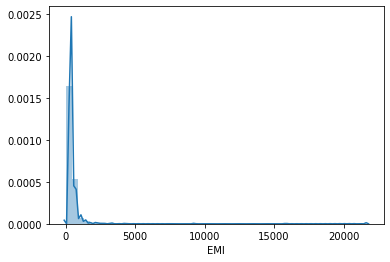

In [143]:
sns.distplot(data.EMI)

In [145]:
#before taking log transform, we make sure the value is not zero
data[data["ApplicantIncome"]==0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,total_income,EMI
639,LP001153,Male,No,0,Graduate,No,0,24000.0,148.0,360.0,0.0,Rural,24000.0,411.111111
730,LP001607,Female,No,0,Not Graduate,No,0,1760.0,180.0,360.0,1.0,Semiurban,1760.0,500.000000


In [147]:
data["ApplicantIncome"][639]=1
data["ApplicantIncome"][730]=1

C:\Users\Utkarsh\anac\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Utkarsh\anac\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [163]:
k=len(data["CoapplicantIncome"])
for i in range(0,k):
    if data["CoapplicantIncome"][i]==0:
        data["CoapplicantIncome"][i]=1

C:\Users\Utkarsh\anac\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [165]:
data["CoapplicantIncome"]

0         1.0
1      1508.0
2         1.0
3      2358.0
4         1.0
        ...  
976    1777.0
977     709.0
978    1993.0
979    2393.0
980       1.0
Name: CoapplicantIncome, Length: 981, dtype: float64

In [166]:
#Feature transformation
#we take log transform for numerical variables that have outliers
data["ApplicantIncome"]=np.log(data["ApplicantIncome"])
data["CoapplicantIncome"]=np.log(data["CoapplicantIncome"])
data["total_income"]=np.log(data["total_income"])
data["Loan_Amount_Term"]=np.log(data["Loan_Amount_Term"])
data["EMI"]=np.log(data["EMI"])

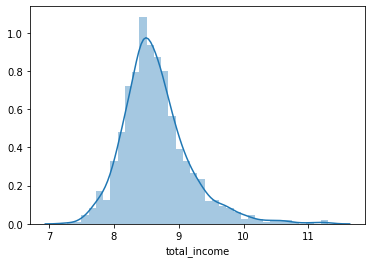

In [170]:
#Plots after log transformation
sns.distplot(data.total_income)

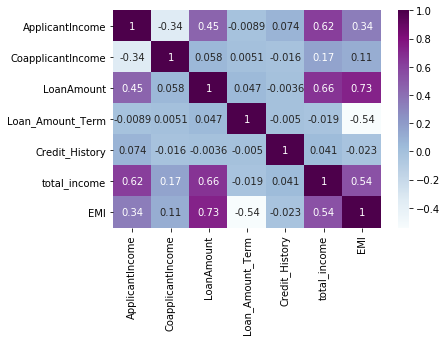

In [174]:
sns.heatmap(data.corr(),cmap='BuPu',annot=True)

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    object 
 2   Married            981 non-null    object 
 3   Dependents         981 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      981 non-null    object 
 6   ApplicantIncome    981 non-null    float64
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    object 
 12  total_income       981 non-null    float64
 13  EMI                981 non-null    float64
dtypes: float64(7), object(7)
memory usage: 107.4+ KB


In [179]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
cols=["Gender","Married","Dependents","Education","Self_Employed","Property_Area"]
le=LabelEncoder()
for col in cols:
    data[col]=le.fit_transform(data[col])

In [181]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,total_income,EMI
0,LP001002,1,0,0,0,0,8.674026,0.000000,142.51153,5.886104,1.0,2,8.674026,5.981074
1,LP001003,1,1,1,0,0,8.430109,7.318540,128.00000,5.886104,1.0,0,8.714568,5.873682
2,LP001005,1,1,0,0,1,8.006368,0.000000,66.00000,5.886104,1.0,2,8.006368,5.211306
3,LP001006,1,1,0,1,0,7.856707,7.765569,120.00000,5.886104,1.0,2,8.505323,5.809143
4,LP001008,1,0,0,0,0,8.699515,0.000000,141.00000,5.886104,1.0,2,8.699515,5.970411


In [218]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,total_income,EMI
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000
mean,0.814475,0.646279,0.767584,0.222222,0.121305,8.306599,4.333503,4.849017,5.800670,0.849134,1.053007,8.649904,5.956102
std,0.388921,0.478368,1.030657,0.415952,0.326648,0.716791,3.857724,0.468113,0.340353,0.358101,0.801302,0.520593,0.554785
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.197225,1.791759,0.000000,0.000000,7.273786,3.218876
25%,1.000000,0.000000,0.000000,0.000000,0.000000,7.963808,0.000000,4.615121,5.886104,1.000000,0.000000,8.334712,5.666042
50%,1.000000,1.000000,0.000000,0.000000,0.000000,8.242756,7.012115,4.852030,5.886104,1.000000,1.000000,8.578100,5.904453
75%,1.000000,1.000000,2.000000,0.000000,0.000000,8.615408,7.768533,5.075174,5.886104,1.000000,2.000000,8.896725,6.214608
max,1.000000,1.000000,3.000000,1.000000,1.000000,11.302204,10.637465,6.551080,6.173786,1.000000,2.000000,11.302204,9.983530


In [217]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [215]:
data["LoanAmount"]=np.log(data["LoanAmount"])

In [220]:
trn=data[0:614]
trn=trn.drop("Loan_ID",axis=1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,total_income,EMI
0,LP001002,1,0,0,0,0,8.674026,0.000000,4.959423,5.886104,1.0,2,8.674026,5.981074
1,LP001003,1,1,1,0,0,8.430109,7.318540,4.852030,5.886104,1.0,0,8.714568,5.873682
2,LP001005,1,1,0,0,1,8.006368,0.000000,4.189655,5.886104,1.0,2,8.006368,5.211306
3,LP001006,1,1,0,1,0,7.856707,7.765569,4.787492,5.886104,1.0,2,8.505323,5.809143
4,LP001008,1,0,0,0,0,8.699515,0.000000,4.948760,5.886104,1.0,2,8.699515,5.970411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,7.972466,0.000000,4.262680,5.886104,1.0,0,7.972466,5.284331
610,LP002979,1,1,3,0,0,8.320205,0.000000,3.688879,5.192957,1.0,0,8.320205,5.403678
611,LP002983,1,1,1,0,0,8.996157,5.480639,5.533389,5.886104,1.0,2,9.025456,6.555041
612,LP002984,1,1,2,0,0,8.933664,0.000000,5.231109,5.886104,1.0,2,8.933664,6.252760


In [226]:
tst=data[614:]
tst=tst.drop("Loan_ID",axis=1)

# Bayesian Optimization using RandomForestClassifier

In [202]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
def ACC(y_true,y_pred):
    return accuracy_score(y_true,y_pred)

accuracy=make_scorer(ACC, greater_is_better=True)

In [203]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization

In [239]:
def rfc_cv(n_estimators, min_samples_split, max_features, max_depth, training, target):
    estimator = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        max_features=max_features,
        random_state=2,
        n_jobs = -1
    )
    cval = cross_val_score(estimator, training, target,
                           scoring=accuracy, cv=5)
    return cval.mean()

In [240]:
def optimize_RFR(training,target):
    
    def rfr_cval(n_estimators, min_samples_split, max_features,max_depth):
        return rfc_cv(
            n_estimators=int(n_estimators),
            min_samples_split=int(min_samples_split),
            max_features=max(min(max_features, 0.999), 1e-3),
            max_depth=int(max_depth),
            training=training,
            target=target)
    
    optimize=BayesianOptimization(
    f=rfr_cval,
    pbounds={
        "n_estimators": (10, 100),
        "min_samples_split": (2, 25),
        "max_features": (0.1, 0.999),
        "max_depth":(2,10)
    }
    #random_state=123
    )
    optimize.maximize(n_iter=15, init_points=10)
    
    print("Final result:", optimize.max)

In [241]:
print("--- Optimizing Extra Trees ---")
optimize_RFR(trn, traget)

--- Optimizing Extra Trees ---
|   iter    |  target   | max_depth | max_fe... | min_sa... | n_esti... |
-------------------------------------------------------------------------
|  1        |  0.7981   |  8.899    |  0.8349   |  10.11    |  72.58    |
|  2        |  0.7932   |  8.056    |  0.4013   |  7.795    |  93.0     |
|  3        |  0.8062   |  3.018    |  0.4286   |  24.55    |  88.45    |
|  4        |  0.7965   |  8.097    |  0.7983   |  10.5     |  18.22    |
|  5        |  0.7981   |  2.211    |  0.2165   |  19.4     |  51.75    |
|  6        |  0.7965   |  5.776    |  0.7879   |  10.98    |  41.12    |
|  7        |  0.7932   |  7.487    |  0.9046   |  17.42    |  53.33    |
|  8        |  0.7981   |  9.029    |  0.1354   |  13.91    |  69.46    |
|  9        |  0.8013   |  4.179    |  0.419    |  2.379    |  74.01    |
|  10       |  0.803    |  3.102    |  0.5782   |  24.41    |  78.66    |
|  11       |  0.8046   |  2.207    |  0.3279   |  2.312    |  11.52    |
|  12  

In [277]:
RFC=RandomForestClassifier(
        n_estimators=88,
        min_samples_split=25,
        max_features=0.4285,
        max_depth=3,
        random_state=2,
        n_jobs = -1)

# Bayesian Optimization using BaggingClassifier(RFC estimator)

In [265]:
from sklearn.ensemble import BaggingClassifier

In [278]:
def bagCal_cv(n_estimators, max_features, training, target):
    estimator = BaggingClassifier(
        base_estimator=RFC,
        n_estimators=n_estimators,
        max_features=max_features
    )
    cval = cross_val_score(estimator, training, target,
                           scoring=accuracy, cv=5)
    return cval.mean()

In [279]:
def optimize_bagCal(training,target):
    
    def bagCal_cval(n_estimators, max_features):
        return bagCal_cv(
            n_estimators=int(n_estimators),
            max_features=max(min(max_features, 0.999), 1e-3),
            training=training,
            target=target)
    
    optimize=BayesianOptimization(
    f=bagCal_cval,
    pbounds={
        "n_estimators": (10,100),
        "max_features": (0.1, 0.999),
    }
    #random_state=123
    )
    optimize.maximize(n_iter=15, init_points=10)
    
    print("Final result:", optimize.max)

In [280]:
print("--- Optimizing Bagging Classification ---")
optimize_bagCal(trn, traget)

--- Optimizing Bagging Classification ---
|   iter    |  target   | max_fe... | n_esti... |
-------------------------------------------------
|  1        |  0.8095   |  0.9619   |  54.19    |
|  2        |  0.7916   |  0.4801   |  19.36    |
|  3        |  0.6873   |  0.383    |  92.82    |
|  4        |  0.7556   |  0.565    |  63.6     |
|  5        |  0.7704   |  0.5372   |  22.61    |
|  6        |  0.8078   |  0.6916   |  47.9     |
|  7        |  0.8078   |  0.7558   |  23.34    |
|  8        |  0.7834   |  0.5375   |  94.49    |
|  9        |  0.8095   |  0.9268   |  97.24    |
|  10       |  0.6889   |  0.2232   |  50.61    |
|  11       |  0.8062   |  0.999    |  10.0     |
|  12       |  0.8095   |  0.999    |  35.85    |
|  13       |  0.8095   |  0.999    |  75.5     |
|  14       |  0.8079   |  0.9954   |  29.97    |
|  15       |  0.8078   |  0.987    |  70.13    |
|  16       |  0.8095   |  0.999    |  42.02    |
|  17       |  0.8095   |  0.999    |  14.3     |
|  18   

In [282]:
BAG=BaggingClassifier(
        base_estimator=RFC,
        n_estimators=54,
        max_features=0.99
    )

# Bayesian Optimization using BaggingClassifier(logistic reg estimator)

In [296]:
from sklearn.linear_model import LogisticRegression
LogReg=LogisticRegression(max_iter=500)

In [297]:
def bagCal_cv1(n_estimators, max_features, training, target):
    estimator = BaggingClassifier(
        base_estimator=LogReg,
        n_estimators=n_estimators,
        max_features=max_features
    )
    cval = cross_val_score(estimator, training, target,
                           scoring=accuracy, cv=5)
    return cval.mean()

In [298]:
def optimize_bagCal1(training,target):
    
    def bagCal_cval(n_estimators, max_features):
        return bagCal_cv1(
            n_estimators=int(n_estimators),
            max_features=max(min(max_features, 0.999), 1e-3),
            training=training,
            target=target)
    
    optimize=BayesianOptimization(
    f=bagCal_cval,
    pbounds={
        "n_estimators": (10,100),
        "max_features": (0.1, 0.999),
    }
    #random_state=123
    )
    optimize.maximize(n_iter=15, init_points=10)
    
    print("Final result:", optimize.max)

In [299]:
print("--- Optimizing Bagging Classification_logreg ---")
optimize_bagCal1(trn, traget)

--- Optimizing Bagging Classification_logreg ---
|   iter    |  target   | max_fe... | n_esti... |
-------------------------------------------------
|  1        |  0.8095   |  0.8156   |  66.52    |
|  2        |  0.8095   |  0.9528   |  12.86    |
|  3        |  0.8095   |  0.7787   |  73.04    |
|  4        |  0.6906   |  0.2805   |  81.13    |
|  5        |  0.8095   |  0.9793   |  65.62    |
|  6        |  0.7637   |  0.4836   |  12.68    |
|  7        |  0.8078   |  0.5206   |  12.09    |
|  8        |  0.8095   |  0.7447   |  50.14    |
|  9        |  0.7915   |  0.4099   |  43.45    |
|  10       |  0.6873   |  0.1697   |  84.77    |
|  11       |  0.8095   |  0.9406   |  99.97    |
|  12       |  0.8095   |  0.999    |  32.76    |
|  13       |  0.8078   |  0.9978   |  10.13    |
|  14       |  0.8095   |  0.999    |  93.2     |
|  15       |  0.6873   |  0.1      |  57.31    |
|  16       |  0.8095   |  0.999    |  25.53    |
|  17       |  0.6873   |  0.1      |  37.93    |
|

In [293]:
BAG1=BaggingClassifier(
        base_estimator=LogReg,
        n_estimators=85,
        max_features=0.861
    )

# Bayesian Optimization using XGB

In [301]:
import xgboost as xgb
from xgboost import XGBClassifier

In [302]:
def xgb_cv(n_estimators, max_depth, gamma, min_child_weight, subsample, training, target):
    estimator = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        gamma=gamma,
        min_child_weight=min_child_weight,
        subsample=subsample,
        random_state=123
        
    )
    cval = cross_val_score(estimator, training, target,
                           scoring=accuracy, cv=5)
    return cval.mean()

In [303]:
def optimize_XGB(training,target):
    
    def xgb_cval(n_estimators, max_depth, gamma, min_child_weight, subsample):
        return xgb_cv(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            gamma=gamma,
            min_child_weight=min_child_weight,
            subsample=subsample,
            training=training,
            target=target)
    
    optimize=BayesianOptimization(
    f=xgb_cval,
    pbounds={
        "n_estimators": (200,400),
        "max_depth": (5,15),
        "gamma": (0,10),
        "min_child_weight": (0,10),
        "subsample": (0.7,1.0)
    }
    #random_state=123
    )
    optimize.maximize(n_iter=10, init_points=10)
    
    print("Final result:", optimize.max)

In [305]:
print("--- Optimizing XGBreg ---")
optimize_XGB(trn, traget)

--- Optimizing XGBreg ---
|   iter    |  target   |   gamma   | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------
|  1        |  0.7964   |  7.206    |  9.733    |  5.233    |  364.2    |  0.705    |
|  2        |  0.7752   |  1.696    |  9.643    |  9.158    |  239.5    |  0.7754   |
|  3        |  0.8095   |  9.647    |  14.74    |  7.328    |  230.6    |  0.748    |
|  4        |  0.8078   |  5.729    |  13.92    |  7.002    |  223.6    |  0.8136   |
|  5        |  0.7785   |  4.98     |  12.44    |  4.681    |  283.7    |  0.7698   |
|  6        |  0.8013   |  5.645    |  11.16    |  5.094    |  260.4    |  0.8784   |
|  7        |  0.7768   |  3.575    |  9.452    |  2.119    |  333.4    |  0.7929   |
|  8        |  0.8013   |  7.767    |  14.83    |  0.1926   |  336.3    |  0.9587   |
|  9        |  0.8029   |  9.007    |  13.96    |  1.946    |  225.1    |  0.7448   |
|  10       |  0.8095   |  8

In [306]:
XGB=XGBClassifier(n_estimators=230,gamma=9.6473,max_depth=14,min_child_weight=7.33,subsample=0.748)

In [307]:
score=cross_val_score(XGB,trn,traget,cv=5)

In [308]:
score.mean()

0.809462881514061

# Stacking

In [314]:
from sklearn.ensemble import StackingClassifier

In [315]:
stack_reg=StackingClassifier(estimators=[('RFC',RFC),('BAG',BAG),('XGB',XGB)])

In [316]:
score=cross_val_score(stack_reg,trn,traget,cv=5,scoring=accuracy)

In [317]:
score.mean()

0.8045848327335733

In [318]:
stack_reg.fit(trn,traget)

StackingClassifier(cv=None,
                   estimators=[('RFC',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=3,
                                                       max_features=0.4285,
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=25,
                                      

In [319]:
prediction=stack_reg.predict(tst)

In [228]:
submission=pd.read_csv("sample_submission_49d68Cx.csv")

In [320]:
submission

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [321]:
submission.Loan_Status=prediction

In [322]:
submission.to_csv("Sub_stack.csv",index=False)